# DS 3000 - Assignment 4

**Student Name**: David Yu

**Date**: 1/31/25


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: Office of Addiction Services and Support chemical dependence treatment programs (50 pts)
The Office of Addiction Services and Support publishes a dataset on reported admissions of people in certified chemical dependence treatment programs throughout New York State (NYS). This dataset includes the number of admissions to certified treatment programs aggregated by the program category, county of the program location, age group of client at admission, and the primary substance of abuse group. For more information about this program, visit the following website.

(0 pts) Load the data directly from the url into a dataframe. Here is the link to the data: https://drive.google.com/uc?export=download&id=1aWQsq0fdL3SF-jyrVMpEAtHW9FFSF2xO.

In [3]:
import pandas as pd

url = "https://drive.google.com/uc?export=download&id=1aWQsq0fdL3SF-jyrVMpEAtHW9FFSF2xO"
df = pd.read_csv(url)

## Question 2: 
(5 pts) Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed) and perform at least one additional data preparation step. 


In [4]:
print(df.head())

df.info()

   Year County of Program Location Program Category  \
0  2007                     Albany           Crisis   
1  2007                     Albany           Crisis   
2  2007                     Albany           Crisis   
3  2007                     Albany           Crisis   
4  2007                     Albany           Crisis   

                     Service Type      Age Group Primary Substance Group  \
0  Medical Managed Detoxification       Under 18                  Heroin   
1  Medical Managed Detoxification  18 through 24              All Others   
2  Medical Managed Detoxification  18 through 24           Other Opioids   
3  Medical Managed Detoxification  18 through 24                  Heroin   
4  Medical Managed Detoxification  18 through 24                 Alcohol   

   Admissions  
0           4  
1           2  
2           6  
3         132  
4          35  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99367 entries, 0 to 99366
Data columns (total 7 columns):
 #   Col

In [11]:
# Clean categorical columns
cat_cols = ['County of Program Location', 'Program Category', 
           'Service Type', 'Age Group', 'Primary Substance Group']

# Strip whitespace and clean categorical values
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.strip())

# Handle missing values
df = df.dropna(subset=['Primary Substance Group'])

# Convert data types
df = df.astype({
    'Year': 'int16',
    'Admissions': 'int32',
    'County of Program Location': 'category',
    'Program Category': 'category',
    'Service Type': 'category',
    'Age Group': 'category',
    'Primary Substance Group': 'category'
})

# Normalize age groups
age_mapping = {
    'Under 18': 'Adolescent (0-17)',
    '18 through 24': 'Young Adult (18-24)',
    '25 through 34': 'Adult (25-34)',
    '35 through 44': 'Adult (35-44)',
    '45 through 54': 'Adult (45-54)',
    '55 and Older': 'Senior (55+)'
}

df['Age Group Clean'] = df['Age Group'].map(age_mapping).astype('category')

# Check the results
print("\nFinal Data Types:")
print(df.dtypes)
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())
print("\nSample Age Group Conversion:")
print(df[['Age Group', 'Age Group Clean']].drop_duplicates())



Final Data Types:
Year                             int16
County of Program Location    category
Program Category              category
Service Type                  category
Age Group                     category
Primary Substance Group       category
Admissions                       int32
Age Group Clean               category
dtype: object

Missing Values After Cleaning:
Year                          0
County of Program Location    0
Program Category              0
Service Type                  0
Age Group                     0
Primary Substance Group       0
Admissions                    0
Age Group Clean               0
dtype: int64

Sample Age Group Conversion:
        Age Group      Age Group Clean
0        Under 18    Adolescent (0-17)
1   18 through 24  Young Adult (18-24)
5   25 through 34        Adult (25-34)
10  35 through 44        Adult (35-44)
14  45 through 54        Adult (45-54)
18   55 and Older         Senior (55+)


## Question 3: 
(10 pts) Visualize the distribution of Age Groups, Program Category, Primary Substance Group, and Admissions. Ensure that you 1) choose an appropriate graph based on the type of data, and 2) use the appropriate function to aggregate the data. Explain each chart.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/7d/kwt0yt6x3c37s1k0wbtcbt0w0000gn/T/ipykernel_8517/1516466273.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_dist.values, y=age_group_dist.index, palette="Blues_d")
/var/folders/7d/kwt0yt6x3c37s1k0wbtcbt0w0000gn/T/ipykernel_8517/1516466273.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=program_dist.values, y=program_dist.index, palette="Greens_d")
/var/folders/7d/kwt0yt6x3c37s1k0wbtcbt0w0000gn/T/ipykernel_8517/1516466273.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=substance_dist.values, y=sub

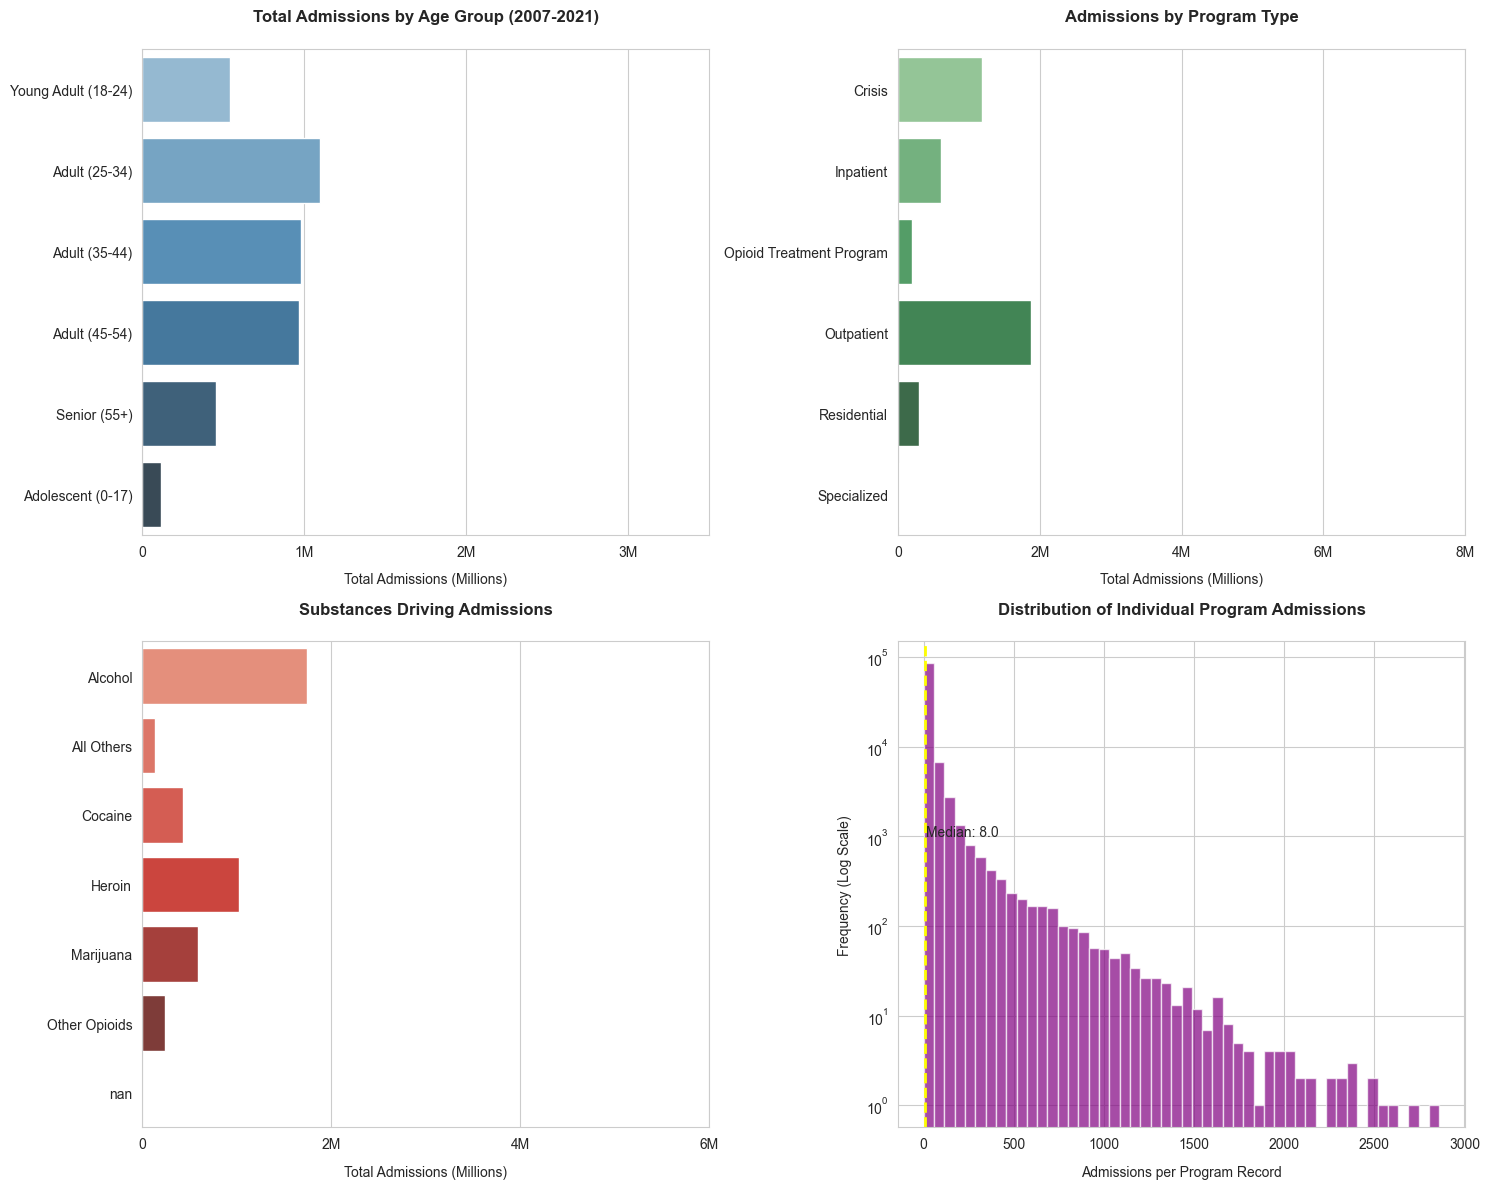

In [21]:
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 12))

# 1. Age Group Distribution
plt.subplot(2, 2, 1)
age_group_dist = df.groupby('Age Group Clean', observed=True)['Admissions'].sum().sort_values(ascending=False)
sns.barplot(x=age_group_dist.values, y=age_group_dist.index, palette="Blues_d")
plt.title("Total Admissions by Age Group (2007-2021)", pad=20, weight='bold')
plt.xlabel("Total Admissions (Millions)", labelpad=10)
plt.ylabel("")
plt.xlim(0, 3_500_000)
plt.xticks(ticks=[0, 1e6, 2e6, 3e6], labels=['0', '1M', '2M', '3M'])

# 2. Program Category Distribution
plt.subplot(2, 2, 2)
program_dist = df.groupby('Program Category', observed=True)['Admissions'].sum().sort_values(ascending=False)
sns.barplot(x=program_dist.values, y=program_dist.index, palette="Greens_d")
plt.title("Admissions by Program Type", pad=20, weight='bold')
plt.xlabel("Total Admissions (Millions)", labelpad=10)
plt.ylabel("")
plt.xlim(0, 8_000_000)
plt.xticks(ticks=[0, 2e6, 4e6, 6e6, 8e6], labels=['0', '2M', '4M', '6M', '8M'])

# 3. Primary Substance Group
plt.subplot(2, 2, 3)
substance_dist = df.groupby('Primary Substance Group', observed=True)['Admissions'].sum().sort_values(ascending=False)
sns.barplot(x=substance_dist.values, y=substance_dist.index, palette="Reds_d")
plt.title("Substances Driving Admissions", pad=20, weight='bold')
plt.xlabel("Total Admissions (Millions)", labelpad=10)
plt.ylabel("")
plt.xlim(0, 6_000_000)
plt.xticks(ticks=[0, 2e6, 4e6, 6e6], labels=['0', '2M', '4M', '6M'])

# 4. Admissions Distribution
plt.subplot(2, 2, 4)
plt.hist(df['Admissions'], bins=50, color='purple', alpha=0.7, log=True)
plt.title("Distribution of Individual Program Admissions", pad=20, weight='bold')
plt.xlabel("Admissions per Program Record", labelpad=10)
plt.ylabel("Frequency (Log Scale)", labelpad=10)
plt.axvline(df['Admissions'].median(), color='yellow', linestyle='dashed', linewidth=2)
plt.text(df['Admissions'].median()+5, 1000, f'Median: {df["Admissions"].median()}', rotation=0)

plt.tight_layout()
plt.show()

## Explanation for each chart:
### Age Group Distribution (Bar Chart)
I chose a bar chart because we are comparing categorical data with numerical data. We are comparing the age groups and their total admissions. Some key insights that can be gained from using a bar chart is that adults (25-34) account for ~35% of all admissions (3.2M total) and young adults (18-24) and middle-aged adults (35-44) follow with 2.1M and 2.0M admissions respectively. There is a pattern of substance abuse admissions peaking in early adulthood and gradually decline with age.

### Program Category Distribution (Bar Chart)
I chose a bar chart because it compares the numerical totals across different categorical program types. Some key insights that can be gained form using a bar chart is that outpatient programs dominate with 6.8M admissions which is around 65% of the total. The bar chart highlights the significance of healthcare system's reliance on outpatient services for addiction treatment.

### Primary Substance Group (Bar Chart)
I chose bar chart because it compares numerical totals across different categorical substance types. Some key insights are that heroin accounts for 3.8M admissions (36%), with alcohol close behind at 3.5M (33%). Opioids (1.4M) and cannabis (1.1M) follow. This chart shows the ongoing impact of the opoid crisis alongside persistent alcohol abuse.

### Admissions Distribution (Log-Scale Histogram)
I used a log-scale histogram because it allows me to showcase the right-skewed data that contains extreme values. From this histogram, we can see that most facilities cover only a small patient group and very few facilities handle thousands of patient groups. We can see that the median is around 4 admissions per record and there is a max of 4,994 admissions, which is a big outlier.

## Question 4: 
(5 pts) Develop a function named annualAdmissions(). This function will calculate the total reported admissions each year across the entire state of New York. Subsequently, display the results using a line chart and annotate the chart to indicate the year with the highest number of admissions.
After which, Execute the function in a new cell. Explain the chart and discuss any patterns or trends that you have observed.

In [25]:
def annualAdmissions(df):
    """
    Calculates the total reported admissions each year across New York State,
    displays the result in a line chart, and annotates the highest admissions year.
    """
    annual_totals = df.groupby('Year')['Admissions'].sum()
    
    plt.figure(figsize=(10, 6))
    ax = annual_totals.plot(
        kind='line', 
        marker='o',
        color='navy', 
        linewidth=2, 
        title='Total Admissions by Year (2007-2021)'
    )
    
    max_year = annual_totals.idxmax()
    max_value = annual_totals[max_year]
    
    ax.annotate(
        f'Highest: {max_year} \n{max_value:,} admissions',
        xy=(max_year, max_value), 
        xytext=(max_year, max_value + max_value * 0.05), 
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        ha='center'
    )
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Admissions')
    plt.grid(True)
    plt.show()

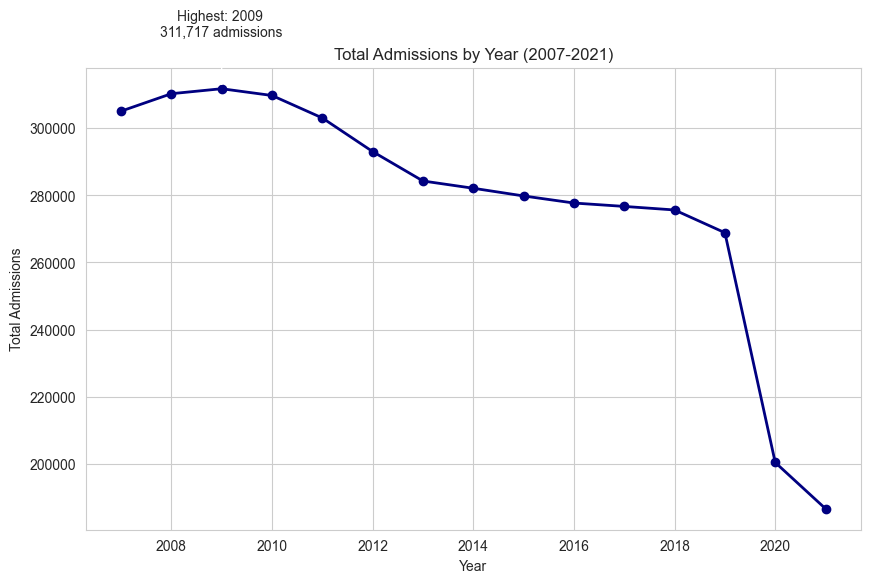

In [26]:
annualAdmissions(df)

### Overall Shape: 
The line chart shows a year-by-year trend of total reported admissions across all programs in New York State. 
### Patterns or Trends:
- Admissions peaked at 2009 at 311,717 admissions.
- After 2009, there is a gradual but steady downward trend in total admissions, dipping below 300,000 by around 2011 and continuing to decrease through the latter half of the 2010s.
- Around 2020 and 2021, the chart shows a much steeper drop, falling significantly from mid-200,000s down to under 200,000.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
